In [1]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

### Read product data

In [2]:
prod_df0 = pd.read_csv('/Users/zulikahlatief/Desktop/personal/ecommerce/src/data/products-data-0.tsv', sep='\t', names=['id', 'category', 'title'])
prod_df1 = pd.read_csv('/Users/zulikahlatief/Desktop/personal/ecommerce/src/data/products-data-1.tsv', sep='\t', names=['id', 'category', 'title'])
prod_df2 = pd.read_csv('/Users/zulikahlatief/Desktop/personal/ecommerce/src/data/products-data-2.tsv', sep='\t', names=['id', 'category', 'title'])
#prod_df3 = pd.read_csv('/Users/zulikahlatief/Desktop/personal/ecommerce/dataset/products-data-3.tsv', sep='\t', names=['id', 'category', 'title'])

In [3]:
frames = [prod_df0, prod_df1, prod_df2]
prod = pd.concat(frames, ignore_index=True)
prod

,id,category,title
0,daa54754-af9c-41c0-b542-fe5eabc5919c,Kitchen,Bodum Travel Press 12-Ounce French Press Coffe...
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,Kitchen,RH Forschner by Victorinox BladeSafe for Knife...
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,Kitchen,Bellemain 12-Cup Nonstick Madeleine Pan
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,Jewelry,8mm Heat Treated Agate Beads Tibetan Buddhist ...
4,329ed5e3-8b47-4e78-961b-18b89e7da808,Jewelry,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...
...,...,...,...
1495,16194779-19a0-41d9-a770-43228a032449,Kitchen,Disposable Filters for Use in Keurig Brewers -...
1496,22ef857b-fcad-4ad8-ab40-925d21ca073b,Kitchen,Bellemain Adjustable Burger Press with Auto Ex...
1497,17c5f4ec-bd21-49fe-b764-5f247b8f92c6,Kitchen,Breville Crispy Crust Pizza Maker
1498,3e241866-942b-4a76-8896-12dec938373d,Kitchen,"Now Designs Owls Canister, Large, Dark Blue"


In [4]:
prod.category.value_counts()

category
Kitchen    750
Jewelry    750
Name: count, dtype: int64

### Read review data

In [5]:
rev_df0 = pd.read_csv('/Users/zulikahlatief/Desktop/personal/ecommerce/src/data/reviews-0.tsv', sep='\t', names=['id', 'category', 'title'])
rev_df1 = pd.read_csv('/Users/zulikahlatief/Desktop/personal/ecommerce/src/data/reviews-1.tsv', sep='\t', names=['id', 'category', 'title'])
rev_df2 = pd.read_csv('/Users/zulikahlatief/Desktop/personal/ecommerce/src/data/reviews-2.tsv', sep='\t', names=['category', 'id', 'title'])
#rev_df3 = pd.read_csv('/Users/zulikahlatief/Desktop/personal/ecommerce/dataset/reviews-3.tsv', sep='\t', names=['id', 'category', 'title'])

In [6]:
frames = [rev_df0, rev_df1, rev_df2]
rev = pd.concat(frames, ignore_index=True)
rev

,id,category,title
0,daa54754-af9c-41c0-b542-fe5eabc5919c,5,Great!
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,5,It fit perfectly on my new<br />Victorinox Fib...
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,5,Excellent pan - my daughter just made madelein...
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,3,not the good one but not bad
4,329ed5e3-8b47-4e78-961b-18b89e7da808,1,This is a rip off. It only comes with this nec...
...,...,...,...
1495,16194779-19a0-41d9-a770-43228a032449,5,Order arrived quickly; product was as described.
1496,22ef857b-fcad-4ad8-ab40-925d21ca073b,5,Best product and fast shipment
1497,17c5f4ec-bd21-49fe-b764-5f247b8f92c6,5,I purhcased this through another vendor and it...
1498,3e241866-942b-4a76-8896-12dec938373d,5,Small but nice


In [7]:
rev = rev.rename(columns={'category': 'rating'})

In [8]:
df = pd.merge(prod, rev, on='id')
df = df.rename(columns = {'title_x' : 'product_name', 'title_y' : 'review'})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1500 non-null   object
 1   category      1500 non-null   object
 2   product_name  1500 non-null   object
 3   rating        1500 non-null   int64 
 4   review        1500 non-null   object
dtypes: int64(1), object(4)
memory usage: 58.7+ KB


In [10]:
df.describe()

,rating
count,1500.000000
mean,4.230667
std,1.257450
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### EDA and pre-processing

In [11]:
df.loc[df.category == "Ktchen", 'category'] = "Kitchen"
df.isnull().sum()

id              0
category        0
product_name    0
rating          0
review          0
dtype: int64

<Axes: ylabel='category'>

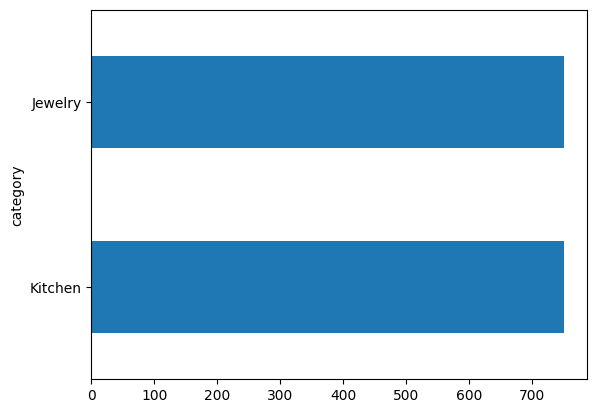

In [12]:
df.category.value_counts().plot(kind='barh')

<Axes: ylabel='rating'>

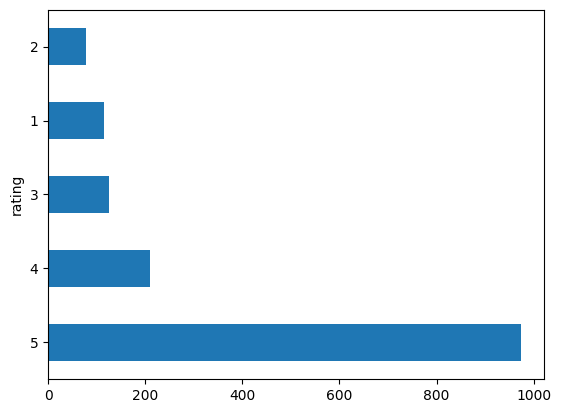

In [13]:
df.rating.value_counts().plot(kind='barh')

In [14]:
df['review'] = df['review'].str.lower() 
df['review'] = df['review'].str.replace('<br />', '') 
df['review'] = df['review'].str.replace('!', '') 

In [15]:
# Tokenize and remove stop words
df['review'] = df['review'].apply(lambda text: ' '.join([word for word in text.split() if word not in stopwords.words('english')]))

In [16]:
filtered_reviews = df[df.rating == 5]
raw_reviews = ' '.join(filtered_reviews['review'])

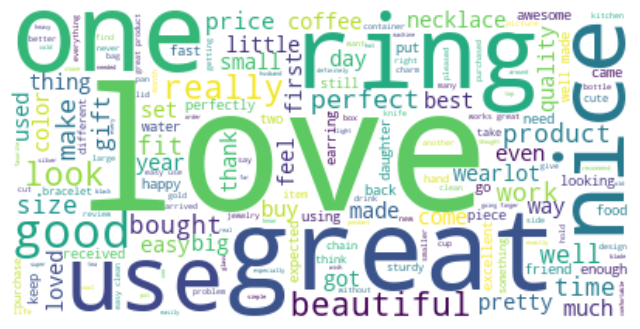

In [17]:
# Generate word cloud for reviews
wordcloud5 = WordCloud(background_color="white").generate(raw_reviews)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
labels = df.pop('category')

### Modelling without CV

In [19]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df, labels, test_size=0.2, random_state=42)
numerical_cols = ["rating"]

# Standardize numerical ratings
scaler = StandardScaler()
X_train_numerical_cols = scaler.fit_transform(X_train[numerical_cols])
X_test_numerical_cols = scaler.transform(X_test[numerical_cols])

# Standardize text columns
# Combine text columns
X_train['combined_text'] = X_train['product_name'] + ' ' + X_train['review']
X_test['combined_text'] = X_test['product_name'] + ' ' + X_test['review']

# TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_train = tfidf_vectorizer.fit_transform(X_train['combined_text'])
tfidf_matrix_test = tfidf_vectorizer.transform(X_test['combined_text'])

# Combine TF-IDF features with the 'rating' column
X_train = pd.concat([pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out()), pd.DataFrame(X_train_numerical_cols, columns=numerical_cols)], axis=1)
X_test = pd.concat([pd.DataFrame(tfidf_matrix_test.toarray(), columns=tfidf_vectorizer.get_feature_names_out()), pd.DataFrame(X_test_numerical_cols, columns=numerical_cols)], axis=1)

# Encode 'category' column
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

# Train a logistic regression model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Evaluate the model on the test set
accuracy_test = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy_test}")

Test Accuracy: 0.98


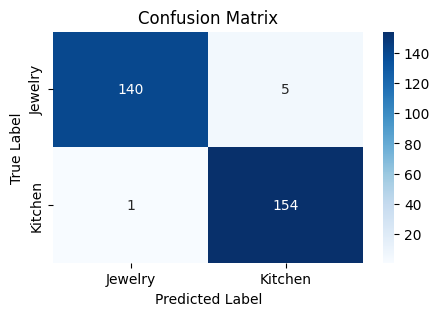

In [21]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()